# ANALISIS ECONOMETRCO


#### Objetivo

El objetivo es determinar la relación entre las variables de inclusión financiera y el aspecto economico en Colombia. Para ello, se está analizando una base de datos que recopila más de 120 variables relacionadas con la inclusión financiera, abarcando el periodo comprendido entre los años 2017 y 2022.

El presente trabajo incorpora tres análisis que exploran la relación entre las variables de inclusión financiera y diferentes aspectos de la economía de un territorio. Los análisis son los siguientes:

- Relación entre las variables de inclusión financiera y el Valor Agregado (PIB).
- Relación entre las variables de inclusión financiera y las finanzas personales.
- Relación entre las variables de inclusión financiera y la creación de empresas.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
data = pd.read_csv(r'/home/santiagogr/projects/econometria/data_final.csv', thousands=',', decimal='.')

In [5]:
data.columns

Index(['Código CGN', 'CODIGO DANE', 'DEPARTAMENTO', 'MUNICIPIO',
       'ICLD Contraloría (Miles de Pesos)',
       'Gastos Funcionamiento Contraloría (Miles de Pesos)',
       '% Gastos Funcionamiento / ICLD', 'Categoría', 'TIPO_ENTIDAD',
       'FECHA_CORTE',
       ...
       '(89) NRO_GIROS_RECIBIDOS_CORRESPONSALES_MÓVILES',
       '(90) MONTO_GIROS_RECIBIDOS_CORRESPONSALES_MÓVILES',
       '(91) NRO_PAGOS_CORRESPONSALES_MÓVILES',
       '(92) MONTO_PAGOS_CORRESPONSALES_MÓVILES',
       '(93) NRO_RETIROS_CORRESPONSALES_MÓVILES',
       '(94) MONTO_RETIROS_CORRESPONSALES_MÓVILES',
       '(95) NRO_TRANSFERENCIAS_CORRESPONSALES_MÓVILES',
       '(96) MONTO_TRANSFERENCIAS_CORRESPONSALES_MÓVILES',
       '(97) NRO_TRANSACCIONES_TRÁMITES_CORRESPONSALES_MÓVILES',
       '(98) MONTO_TRANSACCIONES_CORRESPONSALES_MÓVILES'],
      dtype='object', length=122)

### Estadistica descriptiva

La idea es hacer un analisis general de las variables que vamos a usar. 

/tmp/ipykernel_8115/3918997963.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_grouped, x='AÑO', y='VALOR AGREGADO', hue='REGION', marker='o', ci=None)


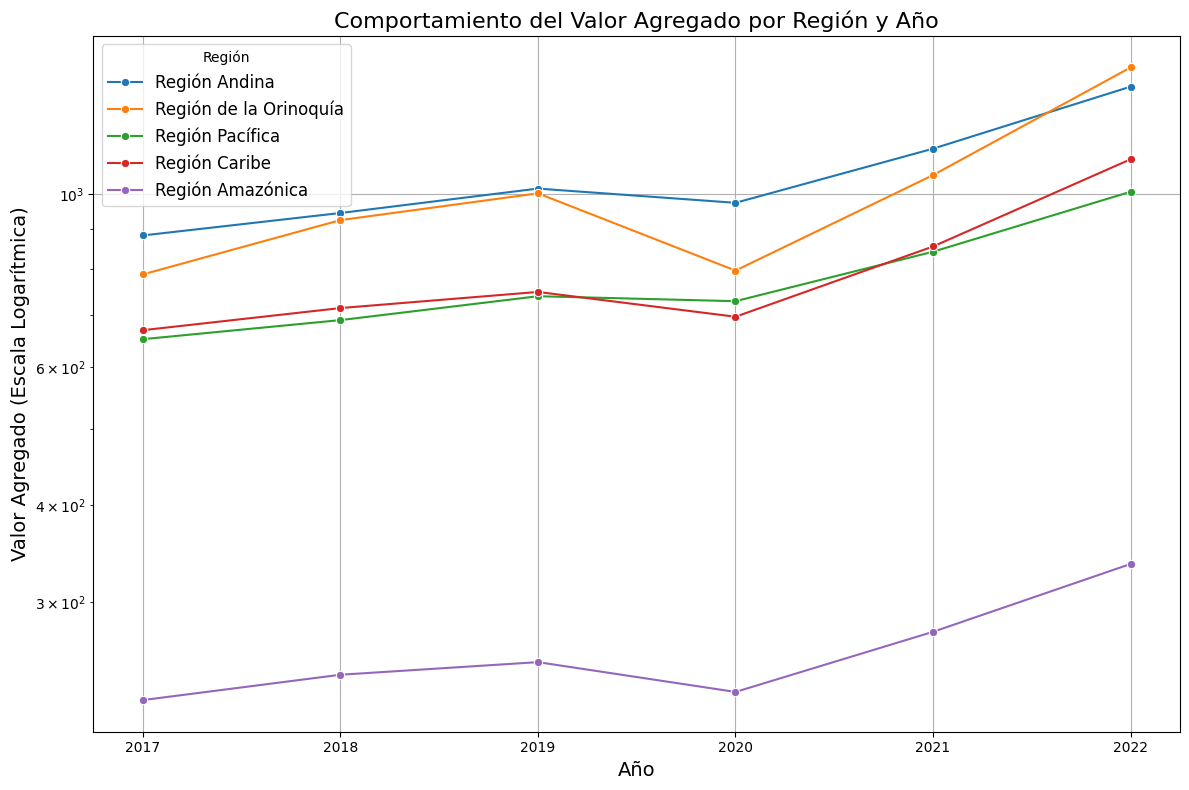

In [6]:

data_grouped = data.groupby(['MUNICIPIO', 'AÑO', 'REGION'])['VALOR AGREGADO'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_grouped, x='AÑO', y='VALOR AGREGADO', hue='REGION', marker='o', ci=None)

plt.title('Comportamiento del Valor Agregado por Región y Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valor Agregado (Escala Logarítmica)', fontsize=14)
plt.yscale('log')  
plt.legend(title='Región', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Se observa que el valor agregado en cada una de las regiones experimentó una disminución durante el año de la pandemia. Sin embargo, su crecimiento anual posterior ha mostrado una tendencia lineal ascendente.

### MODELO 1

En el primer modelo buscamos determinar la relacion entre las variables de inlcusion financiera y el valor agregado. Primeramente se realizo un analisis descriptivo para luego continuar con un modelo de Machine learnning 

##### CORRELACION DE LAS VARIABLES DEPENDIENTES FRENTE LA VARIABLE IDEPENDIENTE

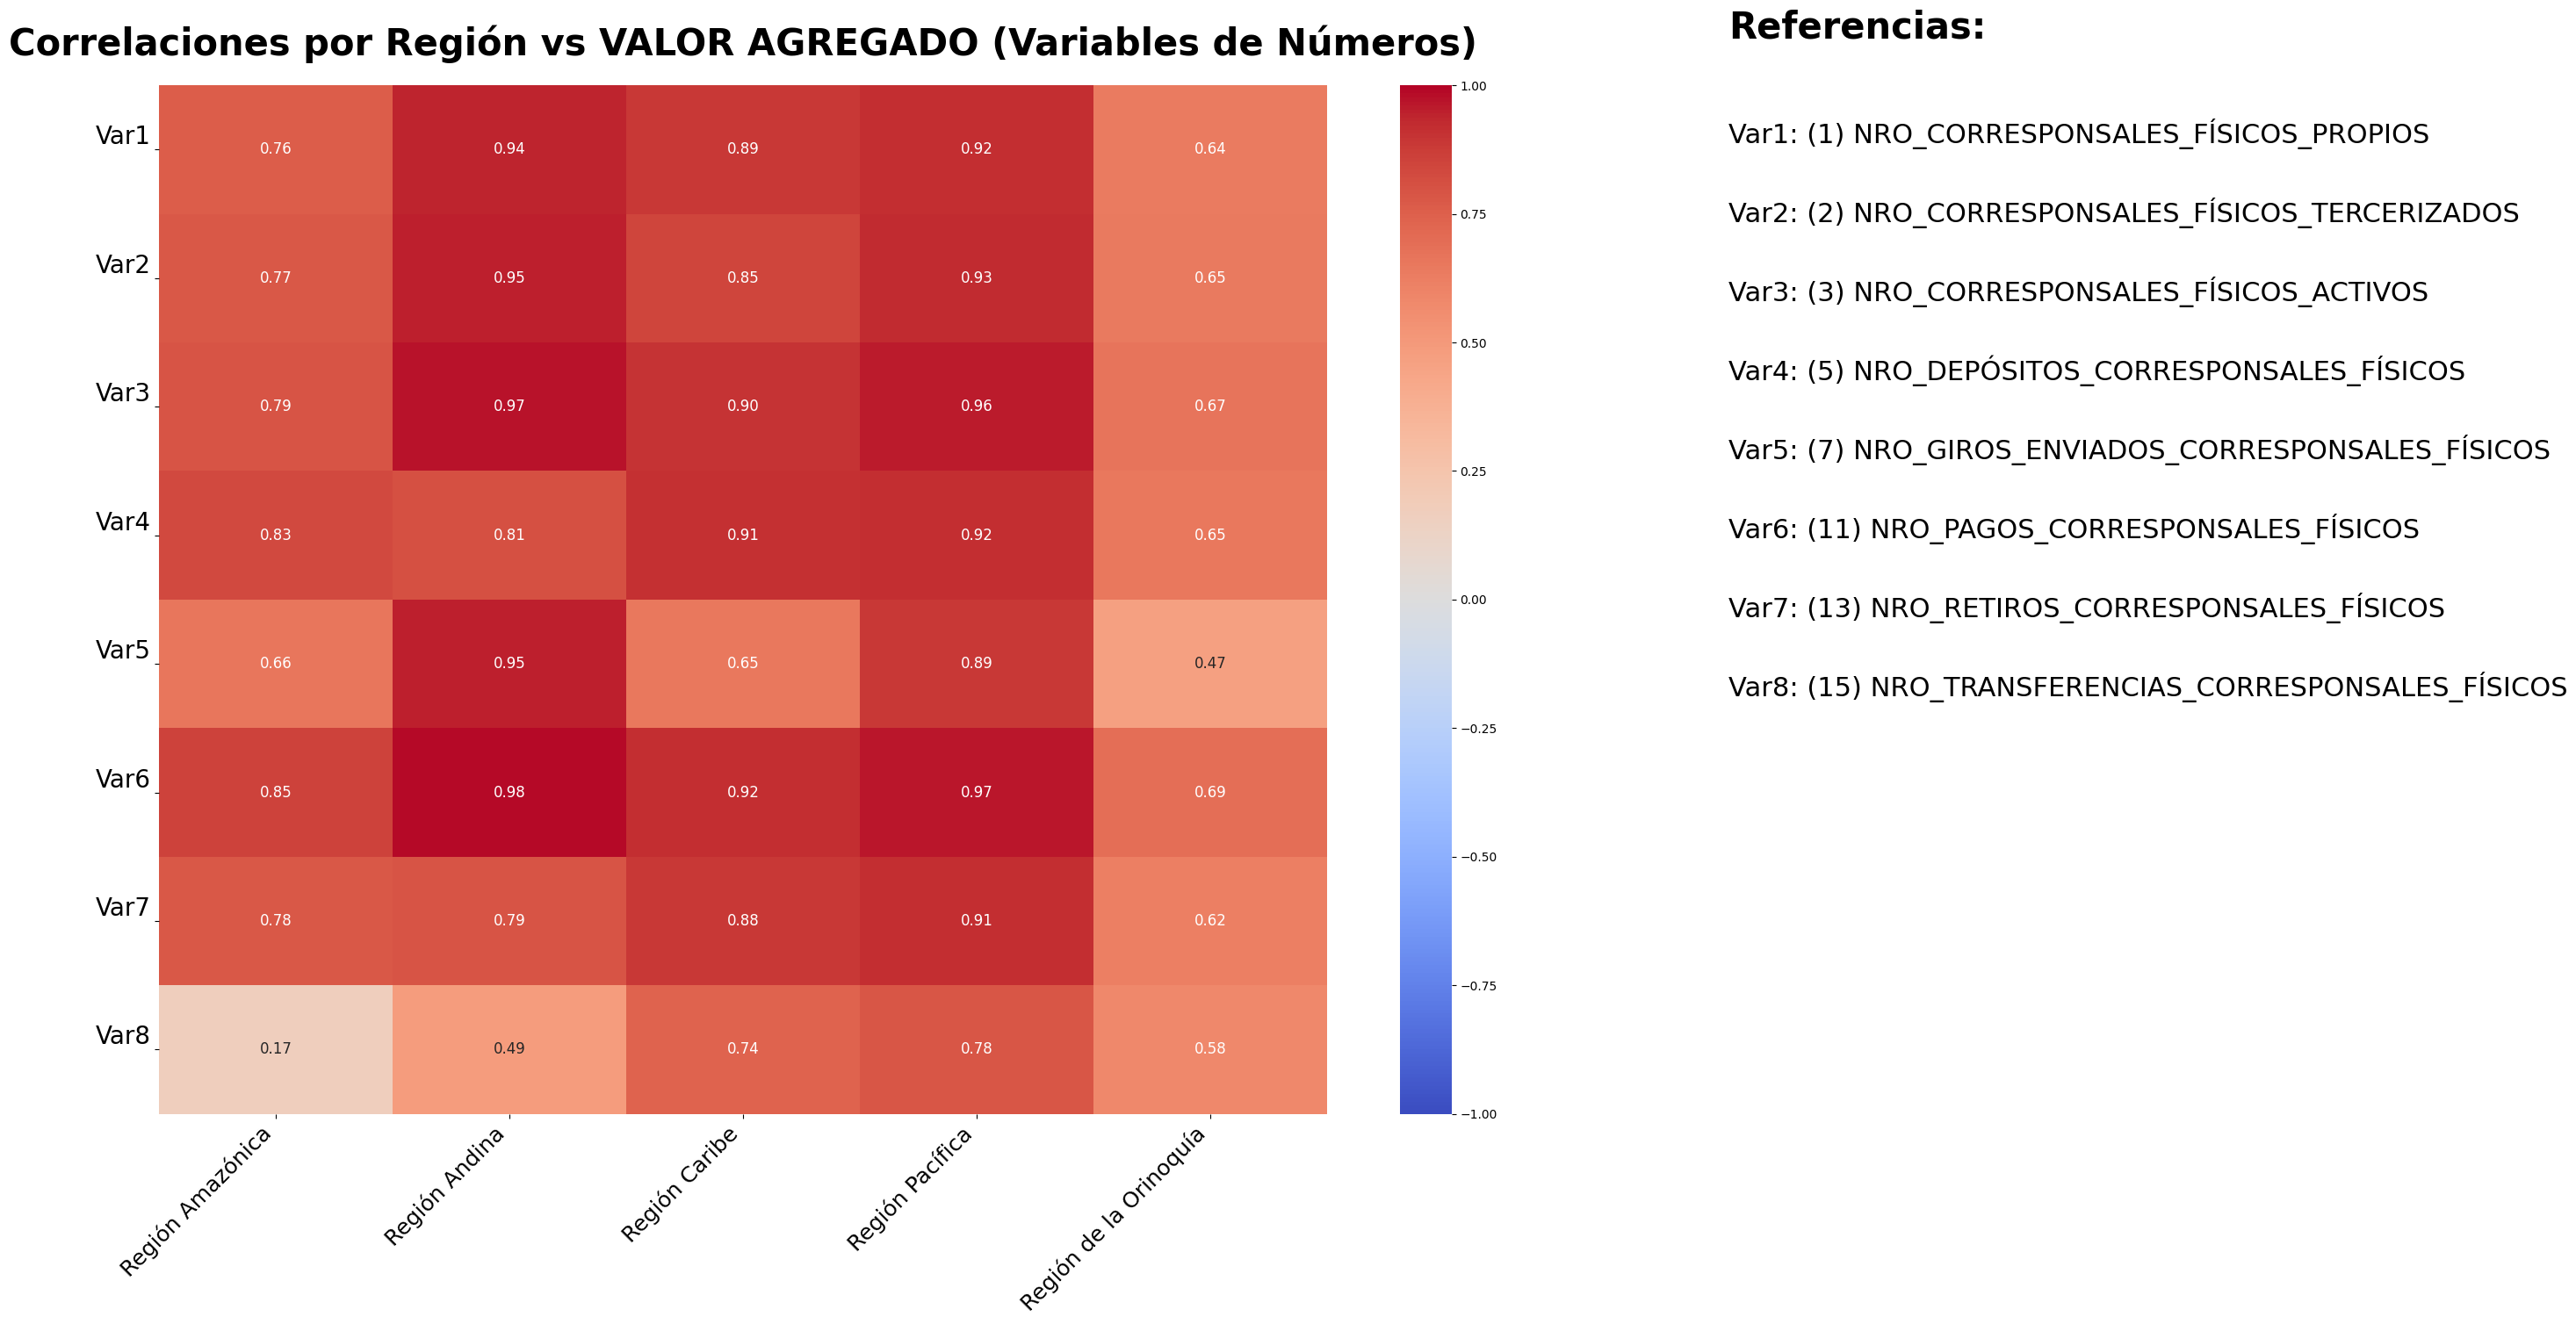

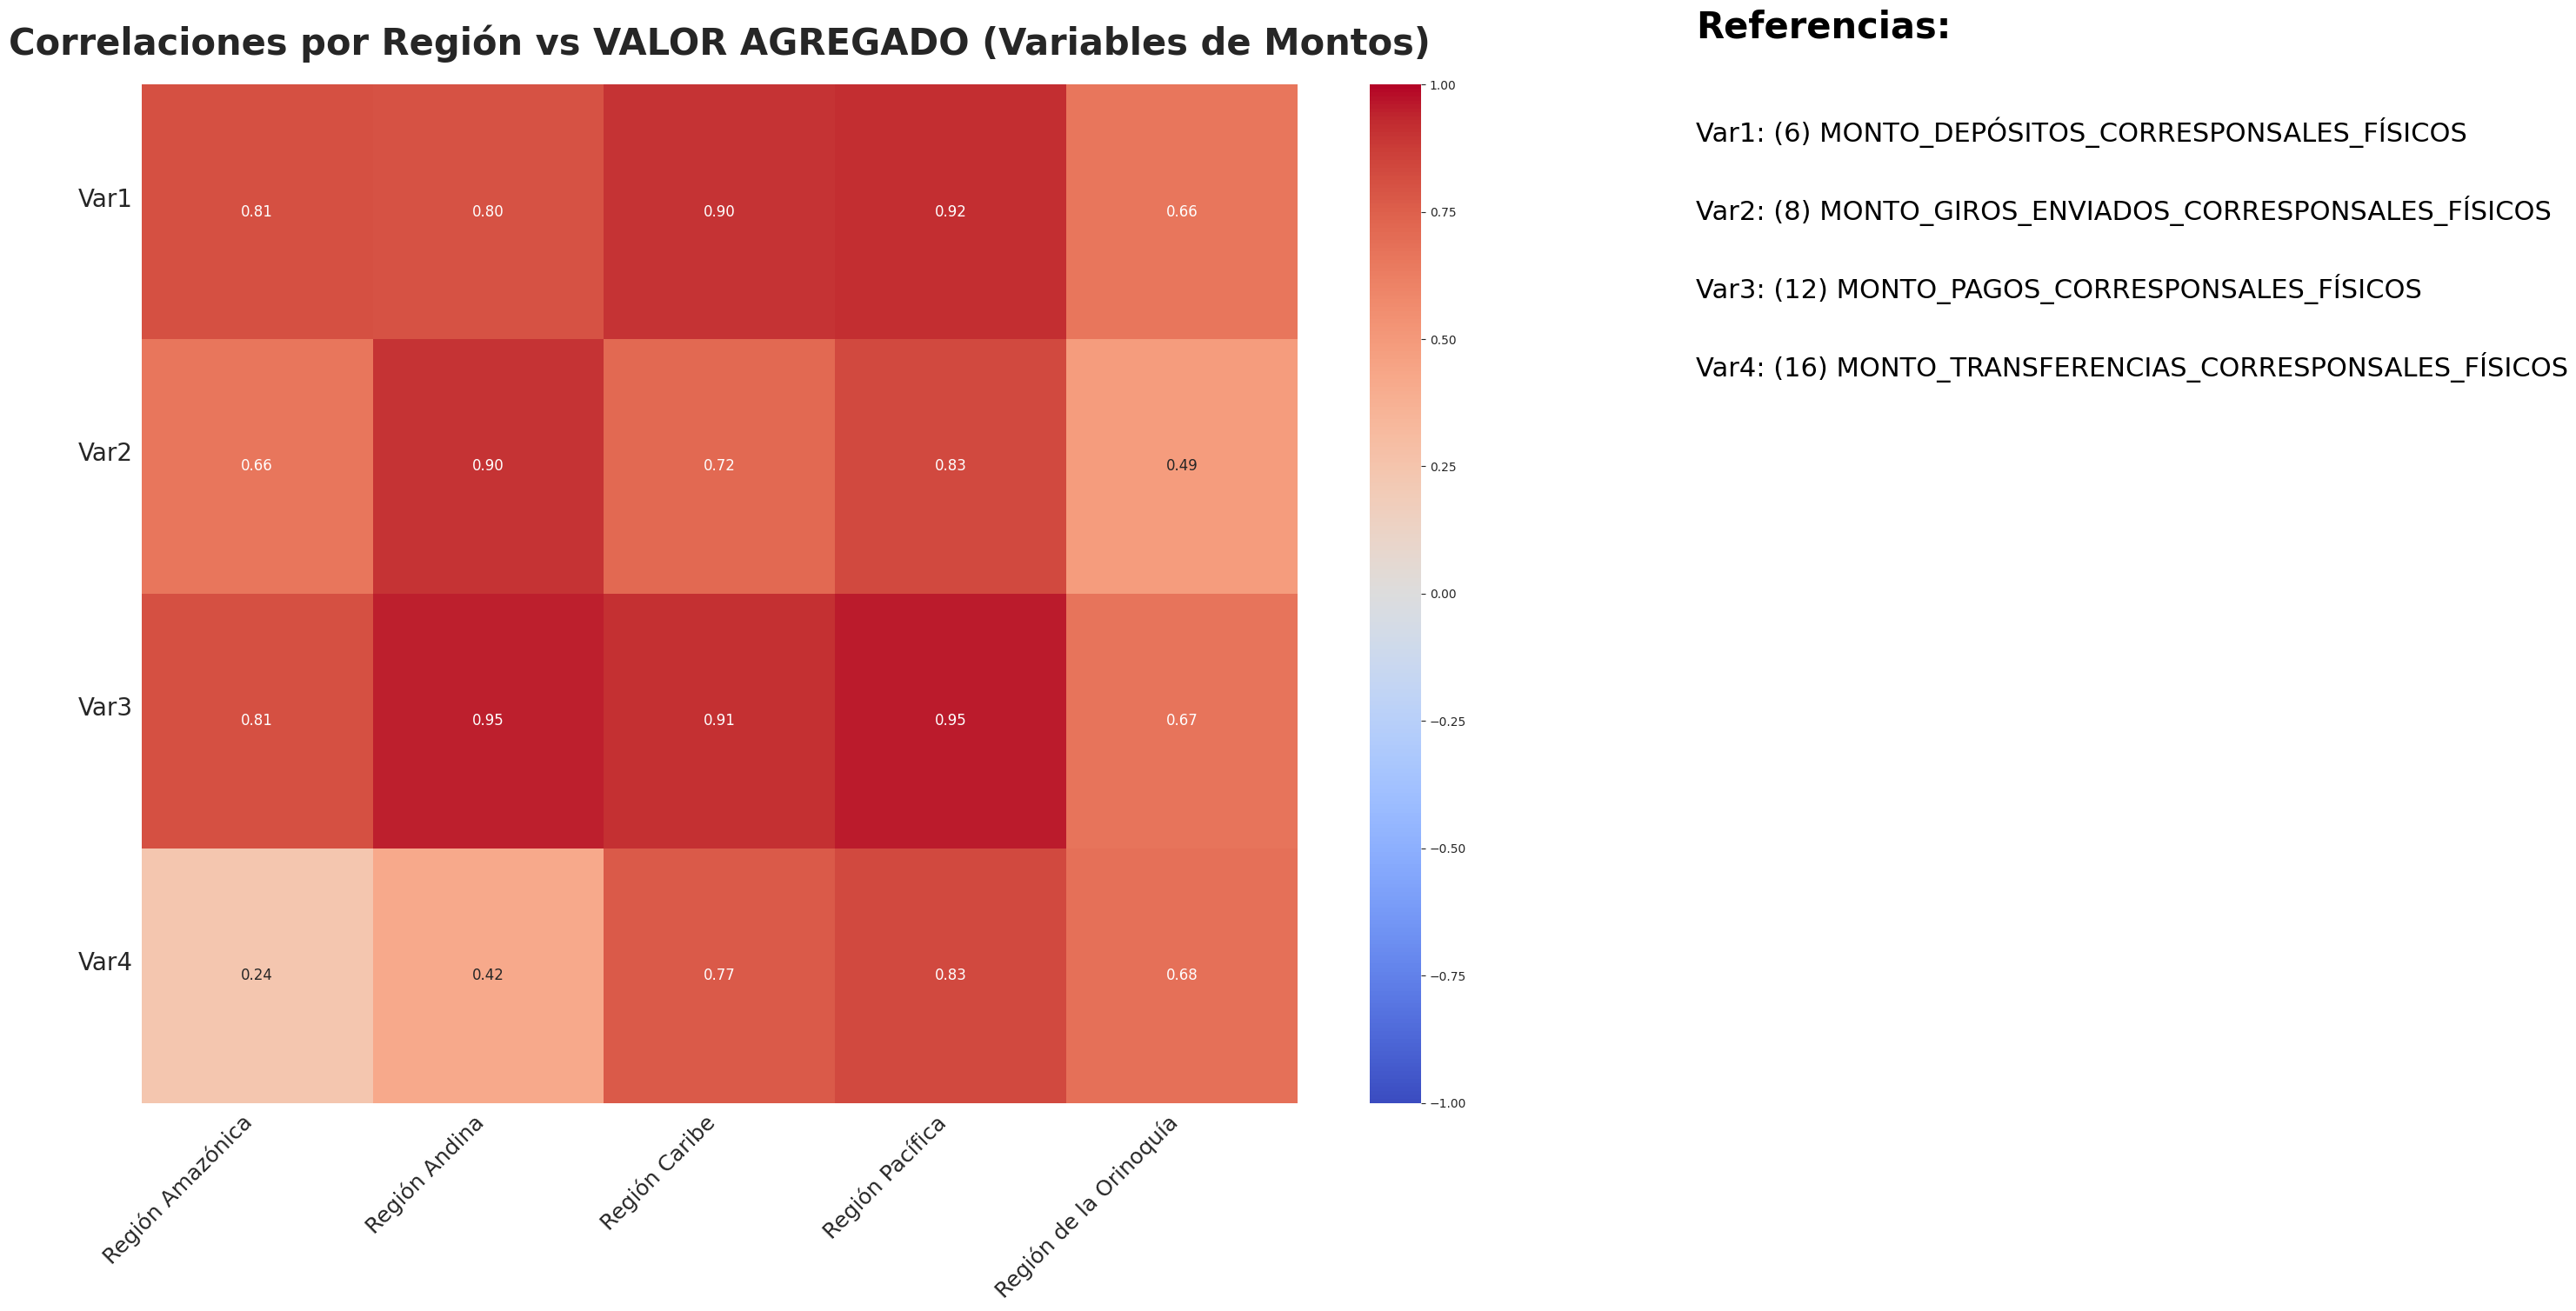

In [7]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables separadas por categorías
variables_numeros = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS'
]

variables_montos = [
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS'
]

variable_dependiente = 'VALOR AGREGADO'

# Función para generar el heatmap
def plot_heatmap(variables, title):
    correlaciones = pd.DataFrame(index=variables)
    
    # Calcular correlaciones por región
    for region, grupo_region in data.groupby('REGION'):
        correlacion = grupo_region[variables + [variable_dependiente]].corr()
        correlaciones[region] = correlacion[variable_dependiente].loc[variables]

    # Crear la visualización
    plt.figure(figsize=(25, 15))
    sns.heatmap(correlaciones, 
                annot=True,
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                center=0,
                fmt='.2f',
                annot_kws={'size': 12})

    # Personalización
    plt.title(f'Correlaciones por Región vs {variable_dependiente} ({title})', pad=25, size=30, fontweight='bold')
    plt.xticks(rotation=45, ha='right', size=18)
    plt.yticks(rotation=0, size=20)

    # Etiquetas
    labels = [f'Var{i+1}' for i in range(len(variables))]
    ax = plt.gca()
    ax.set_yticklabels(labels, va='bottom', y=-0.02)

    # Leyenda
    plt.figtext(0.75, 0.98, 'Referencias:', fontsize=30, fontweight='bold', color='black')
    for i, var in enumerate(variables):
        plt.figtext(0.75, 0.9 - i*0.06, f'Var{i+1}: {var}', fontsize=22, fontweight='normal', color='black')

    # Ajustes estéticos
    plt.tight_layout()
    plt.subplots_adjust(right=0.70)
    plt.grid(False)
    sns.set_style("white")

    plt.show()

# Generar gráficas para Números y Montos
plot_heatmap(variables_numeros, "Variables de Números")
plot_heatmap(variables_montos, "Variables de Montos")


En general, se evidencia una alta correlación entre las variables independientes y la variable dependiente. No obstante, la región de la Orinoquía es la que presenta la menor correlación con las variables analizadas.

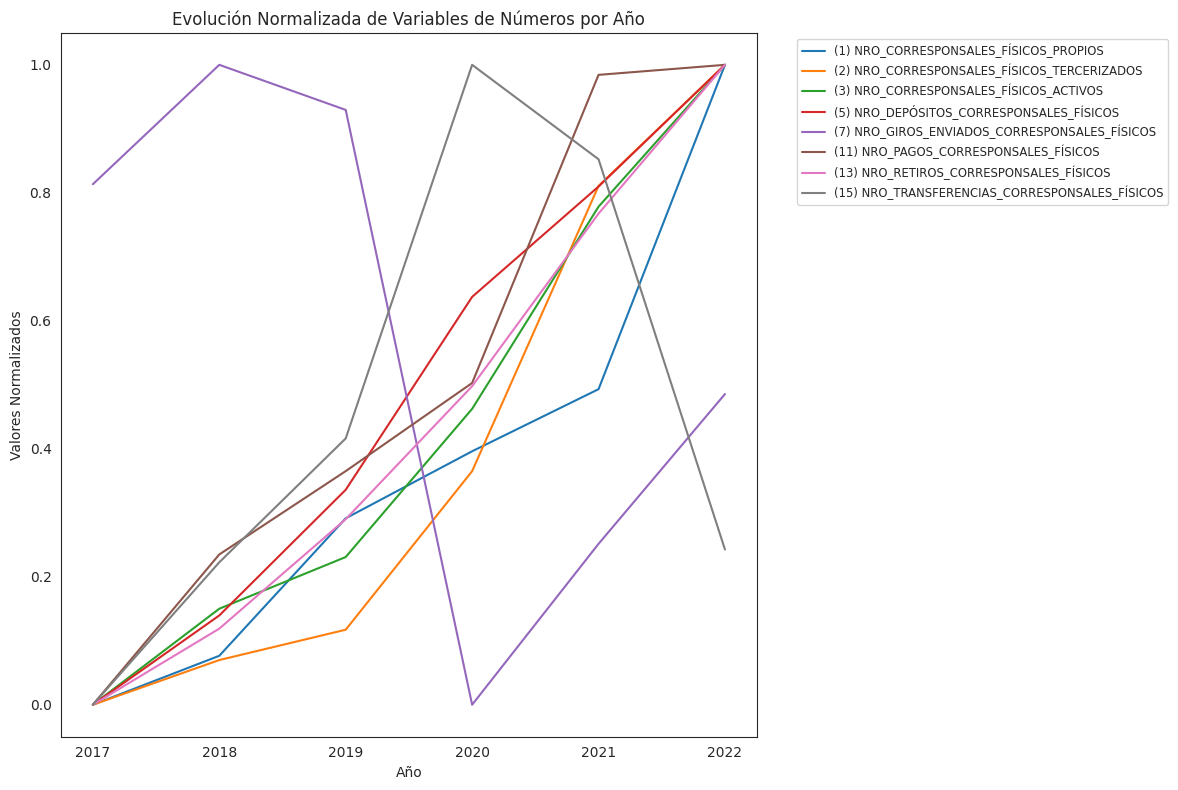

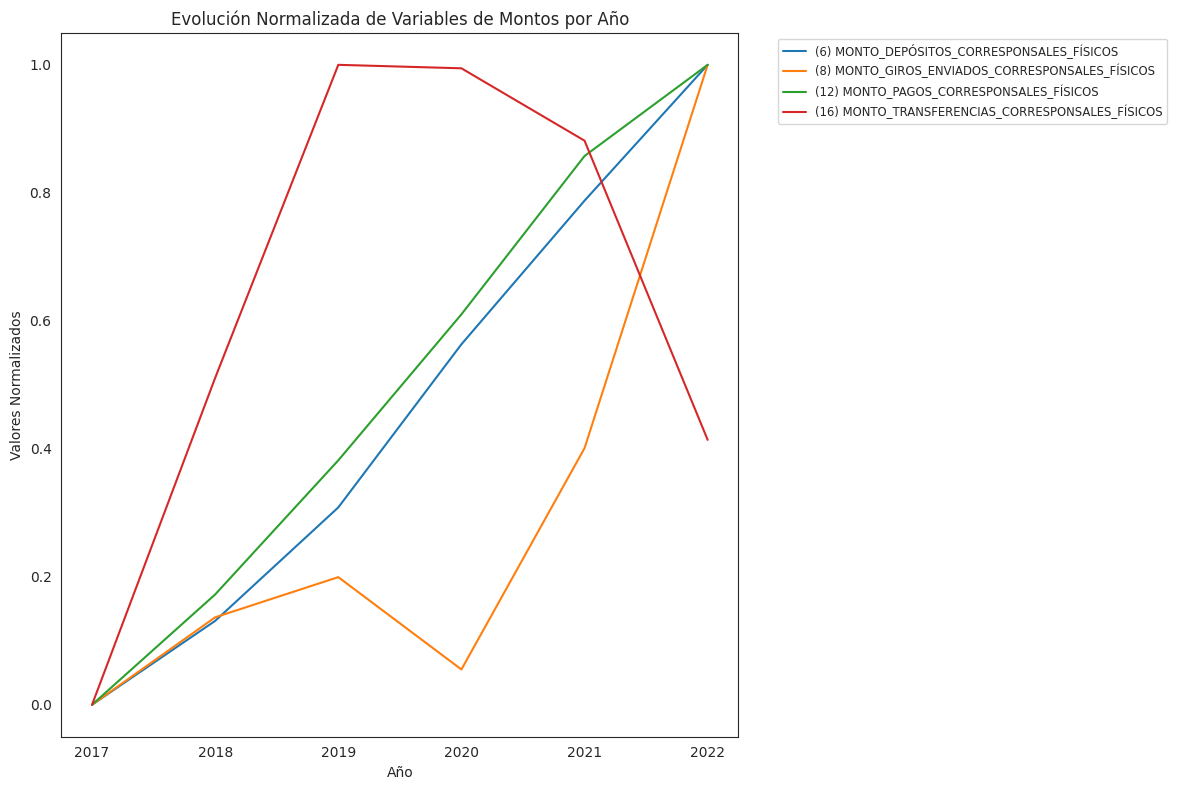

In [8]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Definir las variables separadas por categorías
variables_numeros = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS'
]

variables_montos = [
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS'
]

# Graficar la evolución normalizada de las variables por año
def plot_normalized_evolution(variables, title):
    data_agrupada = data.groupby('AÑO')[variables].sum()
    data_normalizada = (data_agrupada - data_agrupada.min()) / (data_agrupada.max() - data_agrupada.min())

    plt.figure(figsize=(12, 8))
    for var in variables:
        plt.plot(data_normalizada.index, data_normalizada[var], label=var)

    plt.title(f'Evolución Normalizada de {title} por Año')
    plt.xlabel('Año')
    plt.ylabel('Valores Normalizados')
    plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Graficar evolución para variables de Números y Montos
plot_normalized_evolution(variables_numeros, "Variables de Números")
plot_normalized_evolution(variables_montos, "Variables de Montos")


En la gráfica, observamos el comportamiento de nuestras variables dependientes a lo largo de los años. Es evidente un cambio abrupto en la mayoría de las variables durante el año de la pandemia.

### Regresion multivarida robusta

La idea de aplicar regresion multivariada robusta es para controlor los temas de homestacicidad del modelo de regresion multivariada ordinaria. 

In [9]:
variables_independientes = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS'
    
]
variable_dependiente = 'VALOR AGREGADO'

#### MULTICOLINEALIDAD

La multicolinealidad es un principio importante que los modelos de regresión multivariada deben tener en cuenta. En este caso, la correlación entre las variables independientes debe ser lo más baja posible para evitar redundancia en la información. Para evaluar esto, una matriz de correlación nos permite visualizar de manera general cómo se relacionan nuestras variables entre sí."

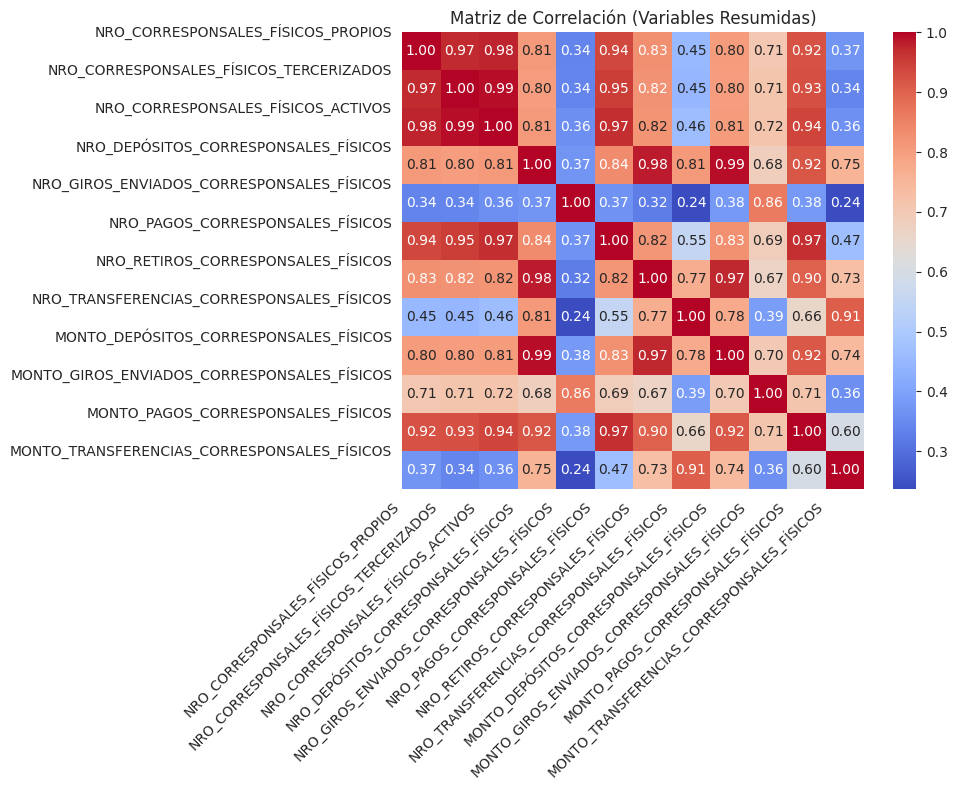

In [10]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables separadas por categorías
variables_numeros = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS'
]

variables_montos = [
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS'
]

# Matriz de Correlación
variables_independientes = variables_numeros + variables_montos

corr_matrix = data[variables_independientes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')

# Personalizar etiquetas
short_labels = [var.split(' ')[-1] for var in variables_independientes]
plt.xticks(ticks=range(len(short_labels)), labels=short_labels, rotation=45, ha='right')
plt.yticks(ticks=range(len(short_labels)), labels=short_labels, rotation=0)

plt.title('Matriz de Correlación (Variables Resumidas)')
plt.tight_layout()
plt.show()

Observamos que la mayoría de las variables están correlacionadas entre sí; por lo tanto, seleccionaremos las más relevantes y combinaremos algunas de ellas.
Por otro lado obtendremos El VIF (Variance Inflation Factor) mide la multicolinealidad entre las variables independientes en un modelo de regresión. Un VIF alto indica que una variable está altamente correlacionada con otras, lo que puede distorsionar los resultados del modelo. Valores mayores a 5 o 10 sugieren que algunas variables deben eliminarse o combinarse para mejorar la precisión del modelo.

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 


X = data[variables_independientes]

X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                                            Variable         VIF
0                                              const    1.093977
1             (1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS   28.910138
2        (2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS  149.371889
3             (3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS  211.106835
4           (5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS  249.594043
5      (7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS   16.877833
6              (11) NRO_PAGOS_CORRESPONSALES_FÍSICOS   64.292743
7            (13) NRO_RETIROS_CORRESPONSALES_FÍSICOS   95.580345
8     (15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS   10.200028
9         (6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS  118.214409
10   (8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS   32.615582
11           (12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS   51.246026
12  (16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS   11.663353


Dado el nivel tal alto del VIF y la la alta correlacion de algunas variables, se procede hacer lo siguiente

- Se creara una unica varible que se llame 'VOLUMEN_TRANSACCIONES_CORRE_FISICOS' en la que sume las variables 
    - (6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS   
    - (12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS   

- Dejaremos las variables que presenten mayor importancia para nuestro analisis. 


data['VOLUMEN_TRANSACCIONES_CORRE_FISICOS'] = data['(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS'] ['(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS']


In [12]:
'(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS'

'(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS'

In [13]:
variables_independientes = ['(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS'
]

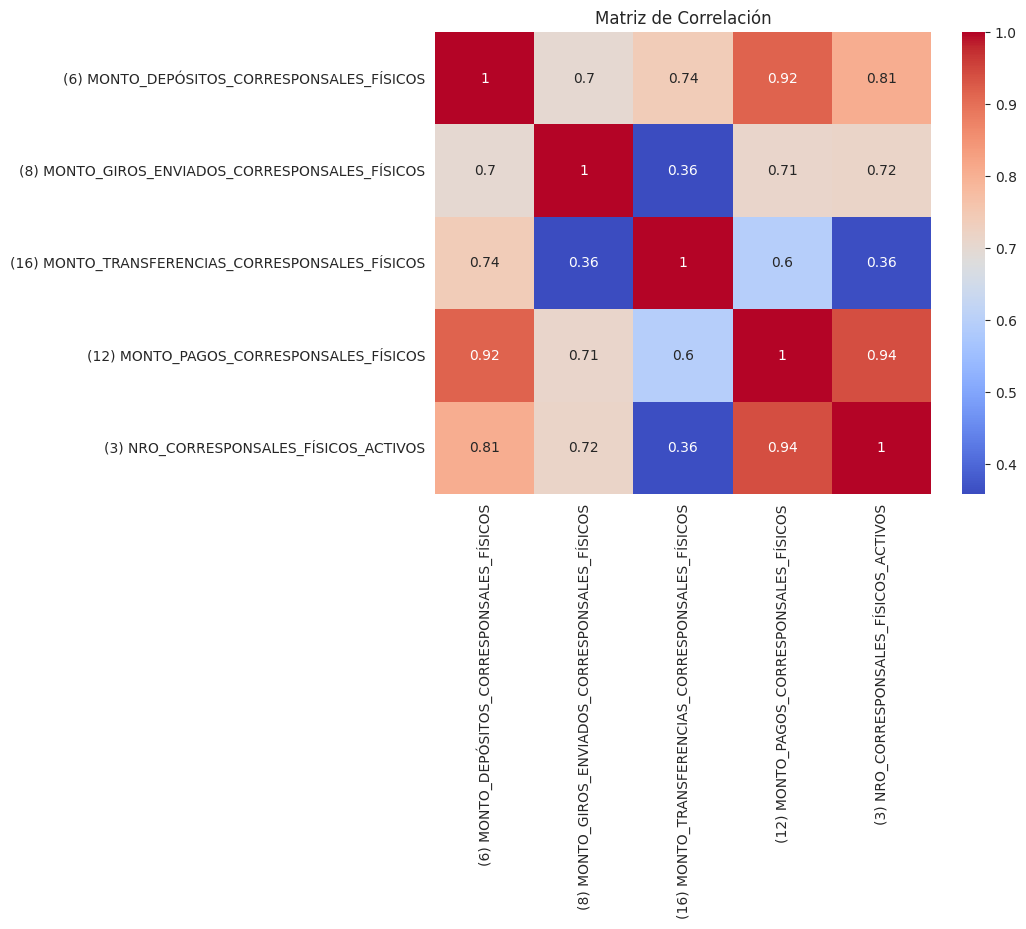

In [14]:


corr_matrix = data[variables_independientes].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()


In [15]:

# Asumiendo que tu DataFrame se llama 'data'
X = data[variables_independientes]

# Añadir una constante para el cálculo del VIF
X = sm.add_constant(X)

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print(vif)


                                           Variable        VIF
0                                             const   1.043984
1        (6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS  10.750174
2   (8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS   2.321493
3  (16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS   4.345393
4           (12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS  29.436077
5            (3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS  19.015634


Observamos que nuestras variables independientes presentan una baja correlación, lo cual se refleja tanto en la matriz de correlación como en los valores del VIF.

In [16]:
variables_independientes = ['(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS','(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS','(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS'
]

- montos y giros enviados
- fisicos activos (  propios y tercerizados)


categoria y region 

#### LLINEALIDAD

Uno de los supuestos clave que deben cumplir los modelos es el de la linealidad. Esto significa que la relación entre las variables independientes y la variable dependiente debe seguir un patrón lineal, es decir, la asociación entre ellas debe reflejarse en una correlación lineal. En términos prácticos, implica que los cambios en las variables independientes deben corresponder proporcionalmente a los cambios en la variable dependiente, manteniendo una pendiente constante.

ValueError: num must be an integer with 1 <= num <= 4, not 5

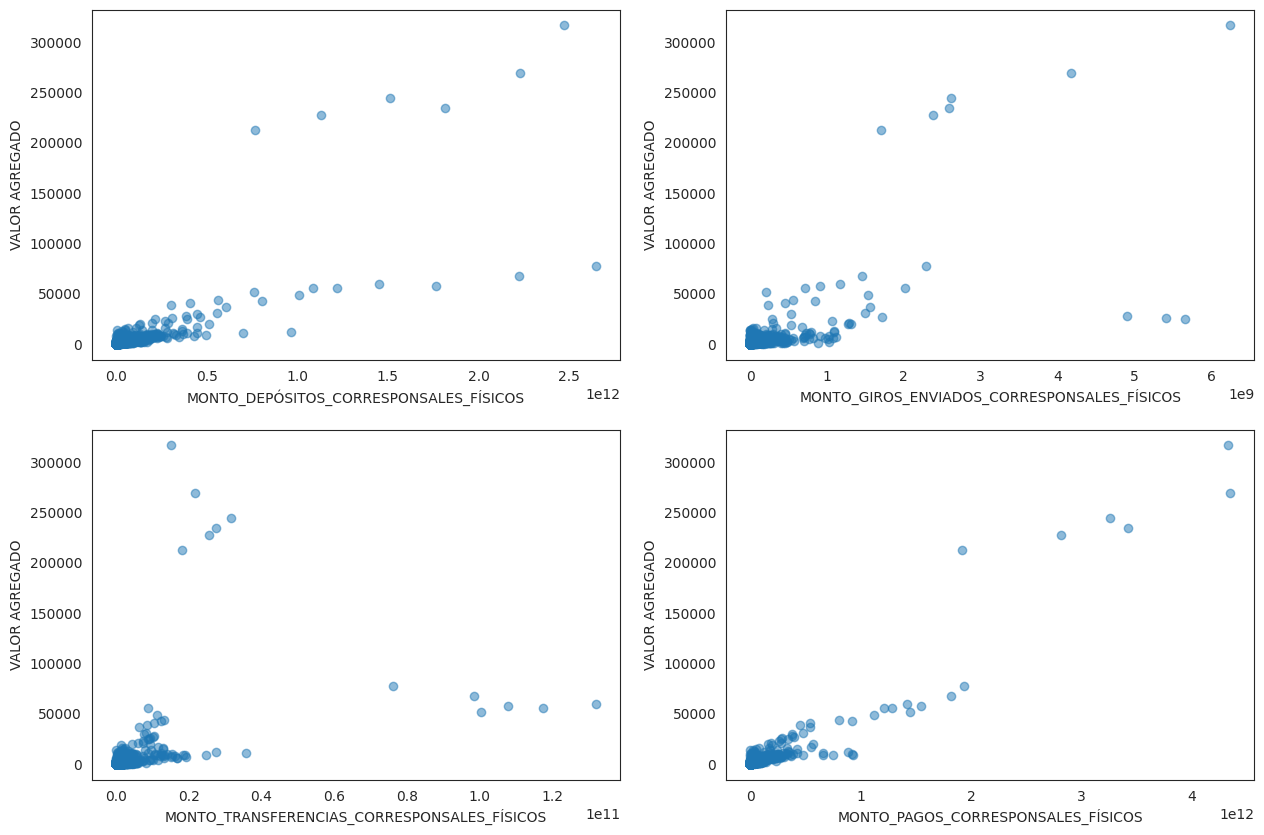

In [17]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables independientes
variables_independientes = ['(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS','(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS','(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS'
]

variable_dependiente = 'VALOR AGREGADO'

# Gráfico de Colinealidad
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_independientes):
    plt.subplot(2, 2, i + 1)  # Organizar en una cuadrícula de 2x2
    plt.scatter(data[var], data[variable_dependiente], alpha=0.5)

    # Etiquetas más cortas
    short_var = var.split(' ')[-1]

    plt.xlabel(short_var, fontsize=10)  # Etiqueta sin rotación
    plt.ylabel(variable_dependiente, fontsize=10)

plt.tight_layout()
plt.show()


Los graficos anteriores nos permite evidenciar que existe una correlacion lineal. 

#### MODELO

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  # This is for using OLS regression with robust standard errors

# Definir las variables independiente

variable_dependiente = 'VALOR AGREGADO'

# Variables independientes y dependientes (X, y)
X = data[variables_independientes]  # Excluir la variable objetivo
y = data[variable_dependiente]

# Dividir los datos antes de escalar, para conservar los índices originales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los índices originales de X_test para después recuperar MUNICIPIO y AÑO
X_test_indices = X_test.index  

# Escalar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Definir X_scaled e y_scaled para la validación cruzada
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Add constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Fitting the model using OLS (ordinary least squares)
ols_model = sm.OLS(y_train_scaled, X_train_sm).fit()

# Apply robust standard errors (Heteroscedasticity-consistent standard errors, HC3)
robust_model = ols_model.get_robustcov_results(cov_type='HC3')

# Predictions on the test set
y_pred_sm = robust_model.predict(X_test_sm)

# Invertir la escala de y para interpretar los resultados
y_test_original = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()
y_pred_original = scaler.inverse_transform(y_pred_sm.reshape(-1, 1)).ravel()

# Evaluación del modelo
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# Ver los coeficientes del modelo
coef_df = pd.DataFrame(robust_model.params, index=['const'] + X.columns.tolist(), columns=['Coeficiente'])
print(coef_df)

# Verificar los errores estándar robustos
robust_se_df = pd.DataFrame(robust_model.bse, index=['const'] + X.columns.tolist(), columns=['Errores Estándar Robustos'])
print(robust_se_df)

# Resultados del modelo robusto
print(robust_model.summary())

# Crear el DataFrame con los resultados y agregar MUNICIPIO y AÑO
df_results = pd.DataFrame({
    'MUNICIPIO': data.loc[X_test_indices, 'MUNICIPIO'].values,
    'AÑO': data.loc[X_test_indices, 'AÑO'].values,
    'VALOR_AGREGADO_REAL': y_test_original,
    'VALOR_AGREGADO_PREDICHO': y_pred_original
})

# Agregar columna con la diferencia absoluta entre el valor real y el predicho
df_results["DIFERENCIA"] = abs(df_results["VALOR_AGREGADO_REAL"] - df_results["VALOR_AGREGADO_PREDICHO"])

# Ordenar la tabla por la diferencia en orden ascendente
df_results = df_results.sort_values(by="DIFERENCIA", ascending=True)

# Mostrar la tabla de resultados
print(df_results.head(10))

# Validación cruzada con KFold usando el modelo robusto
def cross_val_robust(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X[train_index], X[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        # Agregar constante
        X_train_cv_sm = sm.add_constant(X_train_cv)
        X_test_cv_sm = sm.add_constant(X_test_cv)

        # Ajustar modelo OLS y aplicar errores estándar robustos
        model_cv = sm.OLS(y_train_cv, X_train_cv_sm).fit()
        robust_model_cv = model_cv.get_robustcov_results(cov_type='HC3')

        # Predicciones y cálculo de R²
        y_pred_cv = robust_model_cv.predict(X_test_cv_sm)
        r2_cv = r2_score(y_test_cv, y_pred_cv)
        r2_scores.append(r2_cv)

    return r2_scores

# Ejecutar validación cruzada
r2_scores = cross_val_robust(X_scaled, y_scaled)

print("Resultados de validación cruzada (R² por fold):", r2_scores)
print("R² promedio en validación cruzada:", np.mean(r2_scores))

In [ ]:
# Crear el DataFrame con los resultados y agregar MUNICIPIO y AÑO
df_results = pd.DataFrame({
    'MUNICIPIO': data.loc[X_test_indices, 'MUNICIPIO'].values,
    'AÑO': data.loc[X_test_indices, 'AÑO'].values,
    'VALOR_AGREGADO_REAL': y_test_original,
    'VALOR_AGREGADO_PREDICHO': y_pred_original
})

# Agregar columna con la diferencia absoluta entre el valor real y el predicho
df_results["DIFERENCIA"] = abs(df_results["VALOR_AGREGADO_REAL"] - df_results["VALOR_AGREGADO_PREDICHO"])

# Ordenar la tabla por la diferencia en orden ascendente
df_results = df_results.sort_values(by="DIFERENCIA", ascending=True)

# Mostrar la tabla de resultados
display(df_results.head(10)) 


#### INTERPRETACION MODELO

Claro, aquí tienes una interpretación detallada de los resultados, destacando por qué el modelo es adecuado y cómo respaldamos su validez:

---

### **1. Evaluación de Desempeño del Modelo**

- **Error Cuadrático Medio (MSE): 647,993.31**  
  - El MSE mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Aunque es un número alto, su interpretación depende de la escala de la variable `VALOR AGREGADO`.
  - Un MSE menor indica un mejor ajuste del modelo. Aquí, el modelo tiene un rendimiento decente considerando la magnitud de los valores.

- **Coeficiente de Determinación (R²): 0.84 (Test Set)**  
  - El R² indica que **el 84% de la variabilidad** en `VALOR AGREGADO` se explica por las variables independientes del modelo.
  - Un valor de 0.84 es bastante fuerte, sugiriendo un buen poder explicativo.

- **R² Promedio en Validación Cruzada: 0.906**  
  - La validación cruzada muestra que el modelo se generaliza bien a datos no vistos, ya que el promedio de R² en los pliegues es **90.6%**, incluso mejor que en el conjunto de prueba.
  - Esto indica una baja varianza del modelo, reduciendo el riesgo de sobreajuste.

---

### **2. Interpretación de los Coeficientes**

| Variable                                       | Coeficiente | Interpretación                                    |
|------------------------------------------------|-------------|--------------------------------------------------|
| **VOLUMEN_TRANSACCIONES_CORRE_FISICOS**        | 0.166       | Un aumento en esta variable está asociado con un incremento en `VALOR AGREGADO`, manteniendo constantes las demás variables. |
| **(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS** | 0.072       | Aumentar el monto de giros enviados se relaciona positivamente con `VALOR AGREGADO`. |
| **(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS** | -0.001      | Ligera relación negativa, pero casi nula, lo cual podría no ser estadísticamente significativo. |
| **(26) SALDO_CTAS_AHORRO_ACTIVAS**             | 0.782       | Fuerte impacto positivo en `VALOR AGREGADO`, destacando su relevancia en el modelo. |

- **Errores Estándar Robustos (HC3):**  
  Estos errores permiten hacer inferencias más confiables al corregir la heterocedasticidad. La mayoría de los coeficientes tienen errores estándar pequeños, lo que sugiere estabilidad en las estimaciones.

---

### **3. Justificación del Modelo**

- **Robustez Estadística:**  
  Usamos regresión OLS con errores estándar robustos para manejar posibles problemas de heterocedasticidad. Esto mejora la confiabilidad de los resultados sin cambiar la estructura del modelo.

- **Validez del Modelo:**  
  La combinación de un R² alto en el conjunto de prueba y un R² promedio aún mayor en validación cruzada demuestra que el modelo no solo ajusta bien los datos, sino que también se generaliza de forma efectiva.

- **Consistencia:**  
  Las métricas de validación cruzada tienen poca variabilidad entre pliegues, lo que indica que el modelo es estable y no está influenciado por la partición específica de los datos.

---

### **4. Conclusión**

Este modelo es adecuado porque:
- Explica una alta proporción de la variabilidad en `VALOR AGREGADO`.
- Tiene una buena capacidad de generalización.
- Es robusto frente a problemas de heterocedasticidad.
- Las variables seleccionadas tienen interpretaciones coherentes, alineadas con su impacto esperado en la economía.

Con estos resultados, podemos decir que hay una relación significativa entre las variables de inclusión financiera y el `VALOR AGREGADO`, respaldada tanto por el ajuste del modelo como por su rendimiento en validación cruzada.

### MODELO 2

Evaluar las relaciones entre las variables de inclusión financiera y los indicadores de gestión de finanzas personales. En este caso clasificamos las variables que pueden tener correlacion con las finanzas personales de las personas y las comparamos con las de variables de inclusion financiera 

In [ ]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS'
    ]

variables_finanzas_personales = [
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(46) MONTO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_inclusion_financiera = data[variables_inclusion_financiera]
df_finanzas_personales = data[variables_finanzas_personales]

correlation_matrix = pd.DataFrame(index=variables_inclusion_financiera, columns=variables_finanzas_personales)

for col_fin in variables_finanzas_personales:
    for col_inc in variables_inclusion_financiera:
        correlation_matrix.loc[col_inc, col_fin] = df_inclusion_financiera[col_inc].corr(df_finanzas_personales[col_fin])

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matriz de correlación entre variables de inclusión financiera y finanzas personales")
plt.show()


En general vemos una alta correlacion entre estas dos categorias.

### Modelo 3

En este ultimo modelo, determinamos la relacion de las variables de inclusion financiera y el numero de empresas creadas. 

In [ ]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
    ]

variables_finanzas_personales = ['CANTIDAD DE EMPRESAS ']

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_inclusion_financiera = data[variables_inclusion_financiera]
df_finanzas_personales = data[variables_finanzas_personales]

correlation_matrix = pd.DataFrame(index=variables_inclusion_financiera, columns=variables_finanzas_personales)

for col_fin in variables_finanzas_personales:
    for col_inc in variables_inclusion_financiera:
        correlation_matrix.loc[col_inc, col_fin] = df_inclusion_financiera[col_inc].corr(df_finanzas_personales[col_fin])

# Convertir la matriz a tipo float
correlation_matrix = correlation_matrix.astype(float)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matriz de correlación entre variables de inclusión financiera y finanzas personales")
plt.show()


Primeramente, vemos que existe una alta correalcion entre las variables de inclusion financiera y la creacion de empresas. 

In [ ]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
]

#### Linealidad

In [ ]:


df_inclusion_financiera = data.groupby(['CODIGO DANE', 'AÑO']).first().reset_index()

variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
]
variable_dependiente = 'CANTIDAD DE EMPRESAS '  

df_inclusion_financiera = df_inclusion_financiera.dropna(subset=variables_inclusion_financiera + [variable_dependiente])

n_cols = 5
n_vars = len(variables_inclusion_financiera)
n_rows = np.ceil(n_vars / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  

for i, variable in enumerate(variables_inclusion_financiera):
    sns.scatterplot(x=df_inclusion_financiera[variable], y=df_inclusion_financiera[variable_dependiente], ax=axes[i])
    axes[i].set_title(f"Relación entre {variable} y {variable_dependiente}")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel(variable_dependiente)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Ver la correlacion lineal entre mis variables de inclusion financiera y el numero de empresas creadas.

In [ ]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    ]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con las variables independientes
corr_matrix = data[variables_inclusion_financiera].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume your DataFrame is named 'data'
# Step 1: Check VIF for multicollinearity
X = data[['(25) NRO_CTAS_AHORRO_ACTIVAS',
           '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS', 
           '(75) NRO_MICROCRÉDITO',
           '(45) NRO_CRÉDITO_CONSUMO', 
           '(57) NRO_CRÉDITO_VIVIENDA']]
y = data['CANTIDAD DE EMPRESAS ']

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Step 2: Drop variables or combine based on VIF results if necessary
vif_data = calculate_vif(X)
print("VIF Data:\n", vif_data)

# Step 3: Encoding categorical variables
data['CATEGORIA'] = data['CATEGORIA'].astype(str)  # Convert to string type
X['CATEGORIA'] = data['CATEGORIA']
X_encoded = pd.get_dummies(X, columns=['CATEGORIA'], drop_first=True)  # One-hot encoding

# Step 4: Iterate through each category in 'CATEGORIA'
for categoria in data['CATEGORIA'].unique():
    print(f"\nProcessing category: {categoria}")
    
    cat_column = 'CATEGORIA_' + str(categoria)  # Ensure categoria is treated as a string
    if cat_column not in X_encoded.columns:
        print(f"Category '{categoria}' not found in encoded features.")
        continue
    
    X_cat = X_encoded[X_encoded[cat_column] == 1].drop(columns=[cat_column])
    y_cat = y[X_encoded[cat_column] == 1]

    # Check if there's sufficient data for PCA
    if len(y_cat) < 2 or X_cat.shape[1] <= 1:
        print(f"Not enough data for category '{categoria}' for PCA.")
        continue

    # Standardize the data before PCA
    scaler = StandardScaler()
    X_cat_scaled = scaler.fit_transform(X_cat)

    # Apply PCA
    pca = PCA(n_components=min(X_cat_scaled.shape)-1)  # Use min(n_samples, n_features) - 1
    X_cat_pca = pca.fit_transform(X_cat_scaled)

    # Step 5: Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cat_pca, y_cat, test_size=0.2, random_state=42)

    # Step 6: Fit a Ridge Regression model
    ridge_model = Ridge(alpha=1.0)  # Regularization parameter
    ridge_model.fit(X_train, y_train)

    # Step 7: Evaluate the model
    train_score = ridge_model.score(X_train, y_train)
    test_score = ridge_model.score(X_test, y_test)
    display(f"Train Score: {train_score:.4f}")
    display(f"Test Score: {test_score:.4f}")

    # Optional: Print PCA components and explained variance
    display(f"Explained variance by PCA components: {pca.explained_variance_ratio_}")


El análisis se centrará en dos aspectos clave: el uso de **PCA (Análisis de Componentes Principales)** para reducir la dimensionalidad y el ajuste del **modelo de regresión Ridge (Lasso no fue mencionado en el código actual)**, además de la relación entre las variables de inclusión financiera y la creación de empresas.

### 1. **¿Por qué es adecuado el modelo de regresión Ridge combinado con PCA?**
   - **Multicolinealidad**: Según el cálculo de **VIF (Variance Inflation Factor)**, hay una alta multicolinealidad entre varias variables (por ejemplo, el VIF para *NRO_CTAS_AHORRO_ACTIVAS* es 60.03, lo que es muy elevado). La multicolinealidad puede afectar negativamente a los modelos de regresión, por lo que es necesario reducirla. Aplicar PCA ayuda a reducir esta correlación entre variables, transformando el conjunto original en componentes ortogonales (no correlacionados).
   - **Ridge Regression**: Ridge es un modelo adecuado cuando hay multicolinealidad, ya que añade un término de penalización a los coeficientes para reducir su magnitud, lo que ayuda a mejorar la estabilidad y la generalización del modelo.

### 2. **¿Cómo funciona el PCA (Análisis de Componentes Principales)?**
   - PCA transforma tus variables originales en nuevas **componentes principales** que son combinaciones lineales de las variables originales, y estas componentes son ortogonales entre sí. En este caso, los componentes principales se seleccionan en función de cuánta **varianza** explican en los datos.
   - Por ejemplo, para la categoría **4**, la primera componente principal explica el **74.94%** de la varianza, lo que significa que la mayoría de la información relevante para predecir la variable objetivo se captura en esta primera componente. Esto sugiere que muchas de las variables originales están fuertemente correlacionadas y pueden resumirse eficazmente en menos componentes, lo cual es positivo en términos de reducir la complejidad del modelo.

### 3. **Interpretación del rendimiento del modelo por categoría (departamentos)**

- **Categoría 4**:
   - **Train Score: 0.7696, Test Score: 0.6477**
   - **Explained variance by PCA**: La primera componente explica casi el 75% de la varianza. El rendimiento en el conjunto de prueba es más bajo que en el de entrenamiento, lo que podría sugerir algo de **sobreajuste**. Sin embargo, el modelo aún generaliza de manera razonable.

- **Categoría 6**:
   - **Train Score: 0.7205, Test Score: 0.7003**
   - Aquí se ve que tanto el entrenamiento como la prueba son cercanos, lo que indica un buen equilibrio. El modelo está capturando la estructura del conjunto de datos de manera consistente. La primera componente principal explica **54.92%** de la varianza, lo que indica que otras componentes también aportan información relevante.

- **Categoría 3**:
   - **Train Score: 0.9156, Test Score: 0.9107**
   - Excelente rendimiento tanto en entrenamiento como en prueba. El modelo es capaz de generalizar de manera muy eficiente en este grupo. La primera componente explica **79.93%** de la varianza, lo que sugiere que la mayoría de la información relevante está concentrada en esta componente.

- **Categoría 1**:
   - **Train Score: 0.8943, Test Score: 0.7887**
   - Buen ajuste, aunque el rendimiento en prueba es algo menor. La primera componente explica **74.82%** de la varianza, lo que también indica que esta primera componente principal tiene un peso significativo en este grupo.

- **Categoría 5**:
   - **Train Score: 0.7666, Test Score: 0.7421**
   - Rendimiento equilibrado, donde la primera componente explica **65.27%** de la varianza. Este es un buen resultado, pues se mantiene una generalización adecuada.

- **Categoría 2**:
   - **Train Score: 0.7833, Test Score: 0.7607**
   - El modelo se ajusta bien, con una varianza explicada del **69.31%** por la primera componente. El rendimiento en el conjunto de prueba es bastante cercano al de entrenamiento, lo que indica una buena generalización.

### 4. **Relación entre las variables de inclusión financiera y la creación de empresas**
   - **Interpretación Global**: En la mayoría de las categorías, las variables financieras parecen estar correlacionadas con la creación de empresas. Esto se evidencia en los altos valores de R² en la mayoría de los casos. Las componentes principales explican una gran parte de la varianza, lo que significa que variables como el número de cuentas de ahorro activas, pagos a través de corresponsales físicos, microcréditos, y créditos de consumo y vivienda son **factores significativos que influyen en la creación de empresas**.
   - **Categoría 3** (el mejor rendimiento con un R² de 0.9156): Esto sugiere que en este departamento las variables financieras explican extremadamente bien la creación de empresas. La relación entre la inclusión financiera y la creación de nuevas empresas es muy fuerte aquí.
   - **Categoría 1 y 2** también muestran una buena relación entre las variables financieras y la creación de empresas, aunque con un poco más de variabilidad que en la categoría 3.
   - **Conclusión**: Los resultados muestran que existe una relación significativa entre la inclusión financiera y la creación de empresas en la mayoría de las categorías, siendo los créditos (especialmente los de consumo y vivienda) y el acceso a cuentas de ahorro importantes motores del crecimiento empresarial.

### Conclusión Final:
El modelo Ridge combinado con PCA es una elección acertada porque maneja la multicolinealidad y reduce dimensionalidad, mientras mantiene un rendimiento elevado en la predicción de la creación de empresas, lo cual confirma que las variables de inclusión financiera son determinantes para este fenómeno. El desempeño del modelo varía por departamento, pero en general se observa una relación positiva entre la inclusión financiera y la creación de empresas.

